In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import FinanceDataReader as fdr
import mglearn
import sklearn

#분류 모델
from sklearn.svm import LinearSVC
from sklearn import neighbors,svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import FinanceDataReader as fdr
import mglearn
import sklearn

#분류 모델
from sklearn.svm import LinearSVC
from sklearn import neighbors,svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
#스케일러
from sklearn.preprocessing import MinMaxScaler

#성과 평가
from sklearn.metrics import confusion_matrix #오차행렬
from sklearn.metrics import accuracy_score #정확도
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

C:\Program Files\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Program Files\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [52]:
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [53]:
a=olivetti
type(a)
a.keys()
pd.DataFrame()

""


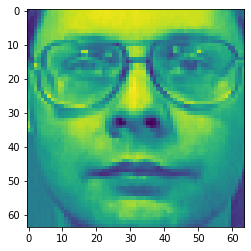

In [54]:
plt.imshow(a["images"][30])

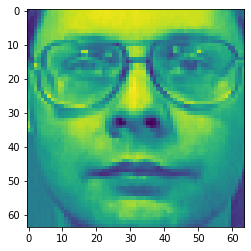

In [55]:
a["images"][0]
plt.imshow(a["images"][30])

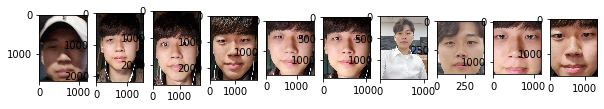

In [4]:
import PIL.Image as pilimg
fig,ax=plt.subplots(1,10,figsize=(10,10))
for x in range(1,11):
    ax[x-1].imshow(pilimg.open("picture/j{}.jpg".format(x)))

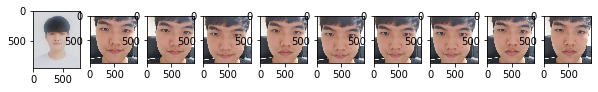

In [60]:
fig,ax=plt.subplots(1,10,figsize=(10,10))
for x in range(1,11):
    ax[x-1].imshow(pilimg.open("picture/s{}.jpg".format(x)))

In [5]:
seung_list=pd.DataFrame()

for x in range(1,11):
    seung_list=pd.concat([seung_list,pd.DataFrame({x :np.ravel(np.array(pilimg.open("picture/s{}.jpg".format(x))),order='C')})],axis=1)
jae_list=pd.DataFrame()
y=[1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0]


In [150]:
a=np.transpose(seung_list)
X=a.dropna()
X[:5]

,0,1,2,3,4,5,6,7,8,9,...,2764790,2764791,2764792,2764793,2764794,2764795,2764796,2764797,2764798,2764799
2,245.0,240.0,236.0,242.0,237.0,233.0,239.0,234.0,230.0,239.0,...,66.0,48.0,57.0,66.0,50.0,59.0,68.0,52.0,61.0,70.0
3,240.0,233.0,227.0,241.0,234.0,228.0,241.0,234.0,228.0,239.0,...,97.0,79.0,87.0,98.0,75.0,83.0,94.0,72.0,80.0,91.0
4,238.0,233.0,227.0,239.0,234.0,228.0,239.0,234.0,228.0,239.0,...,104.0,92.0,96.0,105.0,92.0,96.0,105.0,91.0,95.0,104.0
5,239.0,232.0,226.0,241.0,234.0,228.0,242.0,235.0,229.0,240.0,...,61.0,47.0,61.0,62.0,50.0,64.0,64.0,52.0,66.0,66.0
6,240.0,233.0,227.0,240.0,233.0,227.0,240.0,233.0,227.0,240.0,...,118.0,83.0,100.0,118.0,85.0,102.0,120.0,87.0,104.0,122.0


In [134]:
df2=pd.DataFrame({3:[2,4,6,7,1]})
df=pd.DataFrame({1:[1,2,3,4,5],2:[2,4,6,8,10]})
df_real=pd.concat([df,df2])
df3=pd.DataFrame({4:[1,1,1,1,1]})
df_real=pd.concat([df_real,df3])
df_real

,1,2,3,4
0,1.0,2.0,NaN,NaN
1,2.0,4.0,NaN,NaN
2,3.0,6.0,NaN,NaN
3,4.0,8.0,NaN,NaN
4,5.0,10.0,NaN,NaN
0,NaN,NaN,2.0,NaN
1,NaN,NaN,4.0,NaN
2,NaN,NaN,6.0,NaN
3,NaN,NaN,7.0,NaN
4,NaN,NaN,1.0,NaN


In [48]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
a=iris_dataset
X=a['data']
y=a['target']
df=pd.DataFrame(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
reg=RandomForestClassifier().fit(X_train,y_train)
reg.score(X_test,y_test)

C:\Program Files\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9736842105263158